# Аналитика данных с помощью `pandas` и `matplotlib`

Скачиваем данные для работы:

In [2]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 62.3MB/s]


Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
pd.options.mode.chained_assignment = None

%matplotlib inline

In [4]:
coins = pd.read_csv('/content/coins.csv')
coins.index = coins['date']

In [5]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

In [6]:
print('Всего в датасете '+str(len(coins['name'].unique()))+' различных монет')

Всего в датасете 70 различных монет


**NB**: Из-за децентрализованного и нерегулируемого характера крипторынка две разные монеты могут иметь один и тот же тикер-символ. Поэтому уникальных значений тикера меньше, чем уникальных имен. Это происходит из-за того, что тикеры KNC и BTG повторяются по два раза и причислены к именам двух разных монет (KNC - KingN Coin, Kyber Network; BTG - Bitcoin Gold, Bitgem)

In [7]:
print('Различных тикеров: '+str(len(coins['symbol'].unique())))
print(coins['name'].loc[coins['symbol'] == 'KNC'].unique())
print(coins['name'].loc[coins['symbol'] == 'BTG'].unique())


Различных тикеров: 66
['KingN Coin' 'Kyber Network']
['Bitcoin Gold' 'Bitgem']


In [8]:
# Если для каждого полного имени отобразить все тикеры, используемые с этим полным именем,
# мы увидим, что тикеры для KingN Coin и Kyber Network, а также тикеры для Bitgem и Bitcoin Gold одинаковы,
# хотя это различные монеты


for full_name in coins['name'].unique():
  print(full_name+': '+coins['symbol'].loc[coins['name'] == full_name].unique())

['Bitcoin: BTC']
['Litecoin: LTC']
['Dogecoin: DOGE']
['Vertcoin: VTC']
['DigiByte: DGB']
['Dash: DASH']
['MaidSafeCoin: MAID']
['Stellar: XLM']
['Verge: XVG']
['Tether: USDT']
['NEM: XEM']
['Ethereum: ETH']
['Augur: REP']
['Decred: DCR']
['PIVX: PIVX']
['Lisk: LSK']
['Waves: WAVES']
['Ethereum Classic: ETC']
['NEO: NEO']
['Iconomi: ICN']
['Zcash: ZEC']
['Golem: GNT']
['Gnosis: GNO']
['Aragon: ANT']
['Aeternity: AE']
['Basic Attention Token: BAT']
['Veritaseum: VERI']
['FunFair: FUN']
['TenX: PAY']
['Status: SNT']
['EOS: EOS']
['Gas: GAS']
['Metal: MTL']
['Populous: PPT']
['Bitmark: BTM']
['OmiseGO: OMG']
['Civic: CVC']
['Ethos: ETHOS']
['iCoin: ICN']
['Binance Coin: BNB']
['Bitcoin Cash: BCH']
['Bytom: BTM']
['0x: ZRX']
['VeChain: VEN']
['Nebulas: NAS']
['Waltonchain: WTC']
['Loopring: LRC']
['KingN Coin: KNC']
['TRON: TRX']
['Decentraland: MANA']
['Kyber Network: KNC']
['SALT: SALT']
['Cardano: ADA']
['RChain: RHOC']
['Enigma: ENG']
['Aion: AION']
['KuCoin Shares: KCS']
['ICON: ICX']

In [9]:
# По колонке с датами видим, что отсчет идет по возрастанию, начинается с самой ранней даты
# и заканчивается самой поздней

print('Мы имеем данные с '+coins['date'][0]+' по '+coins['date'][-1])

Мы имеем данные с 2013-04-28 по 2018-06-06


In [10]:
coins[coins.isna().any(axis=1)].isna().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Пропуски есть в колонках price, txCount, txVolume, activeAddresses. Заметим, что все это данные, которые связаны и/или извлекаются из местной сети монеты. Посмотрим на пустые значения:

In [11]:
coins[coins.isna().any(axis=1)]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,,
2014-08-05,2014-08-05,0.002976,NaN,NaN,NaN,XLM,Stellar,0.002976,0.003387,0.002349,0.002440,3.031600e+04,7.725970e+05
2014-08-06,2014-08-06,0.002373,NaN,NaN,NaN,XLM,Stellar,0.002373,0.003402,0.002266,0.002657,3.582000e+04,7.465540e+05
2014-08-07,2014-08-07,0.002686,NaN,NaN,NaN,XLM,Stellar,0.002686,0.003042,0.002455,0.002501,1.428640e+05,9.769420e+05
2014-08-08,2014-08-08,0.002493,NaN,NaN,NaN,XLM,Stellar,0.002493,0.003243,0.002493,0.002881,9.370800e+04,1.075820e+06
2014-08-09,2014-08-09,0.002884,NaN,NaN,NaN,XLM,Stellar,0.002884,0.003710,0.002873,0.003481,2.335790e+05,1.261300e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-04,2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.060000,4.170000,3.830000,3.890000,9.283970e+07,2.135810e+09
2018-06-05,2018-06-05,13.580000,NaN,NaN,NaN,EOS,EOS,13.580000,14.230000,12.970000,14.200000,1.445140e+09,1.217170e+10
2018-06-05,2018-06-05,NaN,632.0,NaN,588.0,VEN,VeChain,3.890000,4.150000,3.800000,4.090000,8.376190e+07,2.047090e+09


Чем они могут быть вызваны? С одной стороны, можно предположить, что изначально этих данных не было - не было совершено транзакций, поэтому данных нет, однако в каждой строке с пустыми значениями цена открытия и цена закрытия разные, то есть торговля все же была. Я предполагаю, что скорее всего проблема в местных сетях монет: возможно, не все хранят конкретную информацию/не со всех сетей ее можно получить, либо монета обслуживается несколькими сетями, либо у нее нет домашней сети и она пользуется другими, если в колонках речь про домашнюю сеть конкретной монеты (я предполагаю, что последний вариант как раз самый вероятный, когда данных по локальной сети нет вообще). Это не может быть ошибка парсинга, так как пропуски данных систематические, например, для Stellar нигде нет количества транзакций и объема переведенных монет, для VeChain систематически отсутствует цена в день торгов и объем торговли

In [12]:
coins.loc[coins['price'] == max(coins['price'])]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,,
2017-12-17,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


Самая высокая цена была у монеты Bitcoin (BTC) 17.12.2017

In [13]:
# Положим, что суммарная капитализация = сумма рыночных капитализаций монеты за все дни торговли

grouper = coins.groupby('name')['market'].sum()

In [14]:
print('Максимальная суммарная капитализация у монеты '+str(grouper.idxmax()))
print('Минимальная суммарная капитализация у монеты '+str(grouper.idxmin()))

Максимальная суммарная капитализация у монеты Bitcoin
Минимальная суммарная капитализация у монеты KingN Coin


In [15]:
# Чтобы отобразить доли, создадим список монет с процентной долей от суммарной капитализации за указанный срок
# Возьмем 4 знака после запятой, чтобы маленькие значения были не нулевыми
# Автоматическое отображение долей на диаграмме я включить не могу, так как они будут накладываться друг на друга

sum_cap = grouper.sum()
keys = grouper.keys()
labels = [key+', '+"{:.4%}".format(grouper[key]/sum_cap) for key in keys]


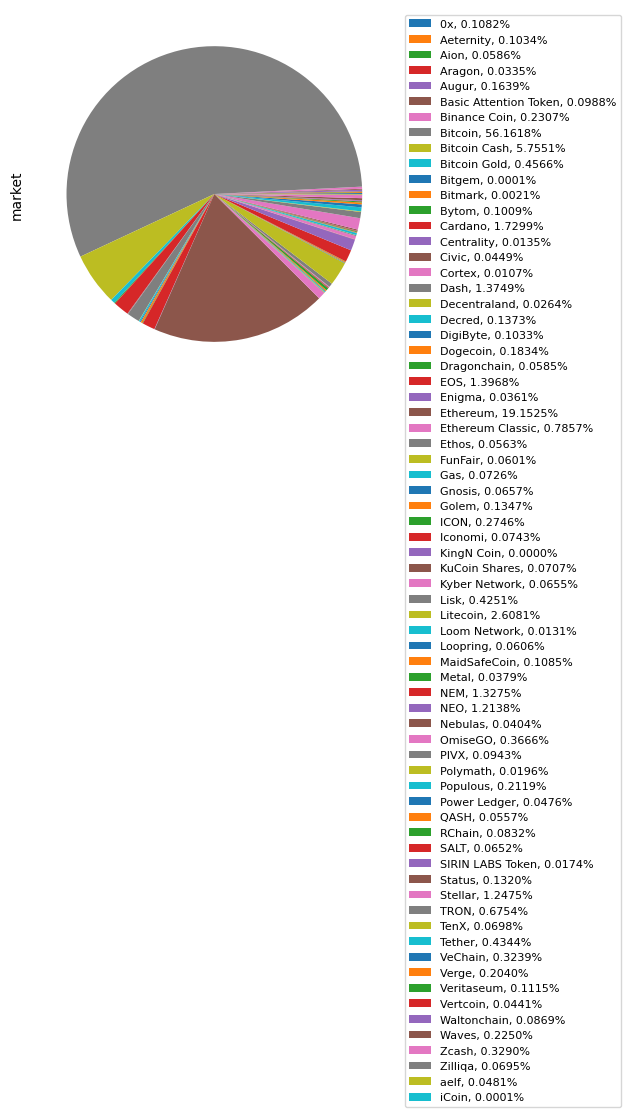

In [16]:
grouper.plot.pie(y='market', labels =None)
plt.legend(labels, loc='best', bbox_to_anchor=[1, 1], fontsize=8)

In [17]:
!pip install mpl_finance

In [18]:
from mpl_finance import candlestick_ohlc

# Чтобы работать с mpl_finance, нужно импортировать библиотеки для обработки дат
import matplotlib.dates as mpl_dates
import datetime

def plot_fancy_price_action(coins, symbol, start_date, end_date):

  # Выбираем из датасета нужные данные по дате и по тикеру

  dates_frame = coins[coins['date'].between(start_date, end_date)]
  symbol_frame = dates_frame[dates_frame['symbol'] == symbol]
  ohlc = symbol_frame.loc[:, ['date', 'open', 'high', 'low', 'close']]

  # Конвертируем даты в численные представления (только так candlestick_ohlc будет их воспринимать как даты)

  ohlc['date'] = pd.to_datetime(ohlc['date'])
  ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
  ohlc = ohlc.astype(float)

  # Создаем график, увеличиваем изображение

  figure, ax = plt.subplots(figsize=(15, 10))
  candlestick_ohlc(ax, ohlc.values, colorup='green', colordown='red')

  # Называем оси, график, добавляем сетку

  ax.set_xlabel('День')
  ax.set_ylabel('Цена')
  figure.suptitle('Свечной график '+symbol+' за период с '+start_date+' по '+end_date)
  plt.grid(which='major')

  # Возвращаем даты к читаемому формату, чтобы отобразить их на оси Х

  date_format = mpl_dates.DateFormatter('%d-%m-%Y')
  ax.xaxis.set_major_formatter(date_format)
  figure.autofmt_xdate()

  plt.show()


Посмотрим, что получилось:

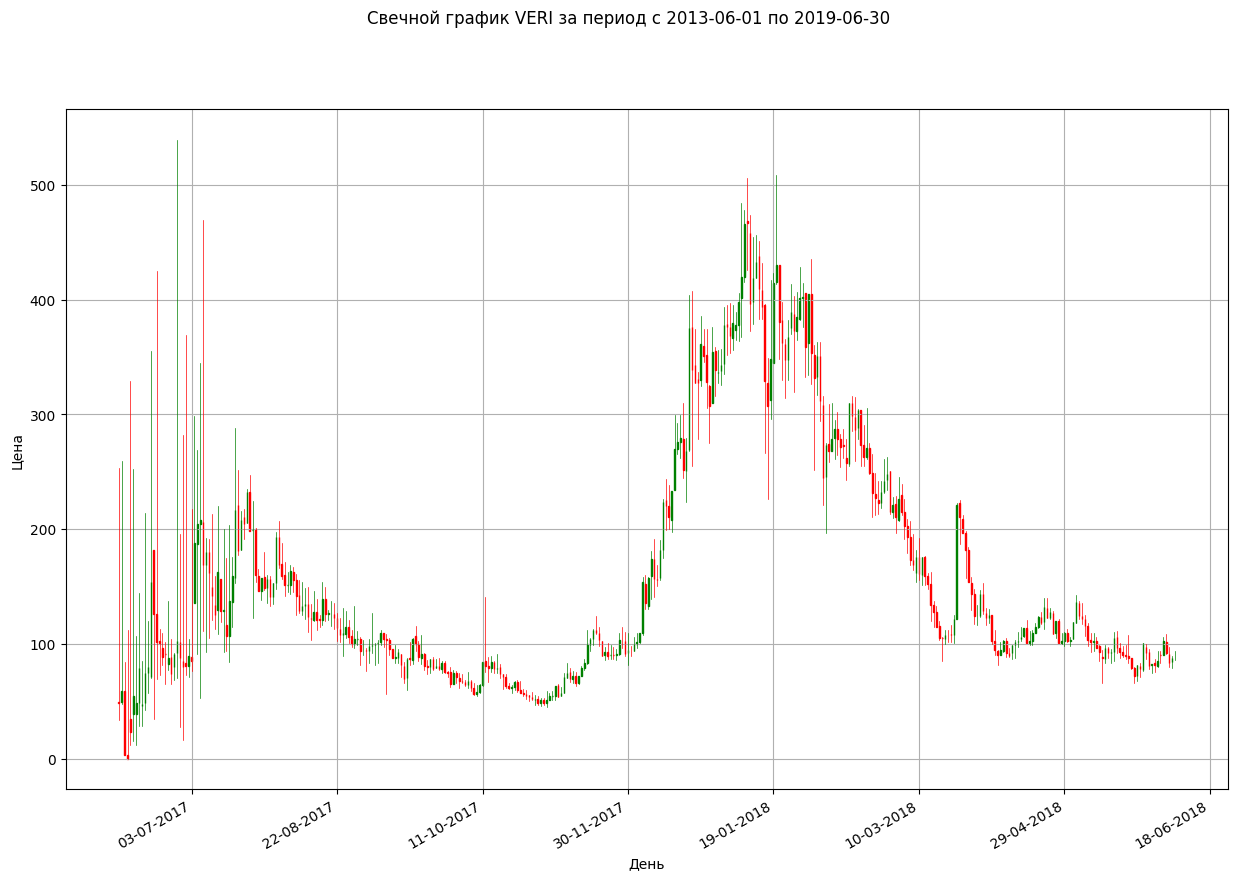

In [19]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Поиск случаев pump-n-dump (накачка и сброс)

In [149]:

def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):

  dates_frame = coins[coins['date'].between(start_date, end_date)]
  symbol_frame = dates_frame[dates_frame['symbol'] == symbol]

  symbol_frame['oc_max'] = symbol_frame[['open', 'close']].max(axis=1)
  symbol_frame['pnd'] = symbol_frame['high']/symbol_frame['oc_max']

  return max(symbol_frame['pnd']), symbol_frame.index[symbol_frame['pnd'] == max(symbol_frame['pnd'])][0]



In [150]:
max_pnd, max_date = find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
print("Максимальное значение pump'n'dump: "+str(max_pnd))
print("Дата максимального pump'n'dump: "+str(max_date))

Максимальное значение pump'n'dump: 1.1428940004366206
Дата максимального pump'n'dump: 2017-11-29


Сравните эти значения для разных монет:

In [152]:
symbols_pnd = list(coins['symbol'].unique())
pnds = pd.DataFrame(columns = ['max_pnd', 'max_date'], index=coins['symbol'].unique())
for symbol in symbols_pnd:
  max_pnd, max_date = find_most_severe_pump_and_dump(coins, symbol, start_date='2017-06-01', end_date='2018-06-01')
  pnds['max_pnd'][symbol] = max_pnd
  pnds['max_date'][symbol] = max_date

In [153]:
pnds

,max_pnd,max_date
BTC,1.14,2017-11-29
LTC,1.11,2018-02-07
DOGE,1.27,2017-12-17
VTC,1.4,2017-10-22
DGB,1.36,2017-12-17
...,...,...
ZIL,1.46,2018-03-05
POLY,1.46,2018-02-02
CENNZ,1.18,2018-04-07
LOOM,1.53,2018-03-14


In [161]:
print(max(pnds['max_pnd']))
print(pnds.index[pnds['max_pnd'] == max(pnds['max_pnd'])][0])

33.549253731343285
VERI


Максимальное значение pnd - 33.6, монета VERI

In [155]:
print(min(pnds['max_pnd']))
print(pnds.index[pnds['max_pnd'] == min(pnds['max_pnd'])][0])

1.099009900990099
USDT


Минимальное значение pnd - 1.09, монета USDT (неудивительно, так как это стейблкоин, привязанный к курсу доллара, а pump'n'dump доллара - вещь сомнительная, в отличие от крипторынка рынок валют регулируется и слишком велик, чтобы заниматься подобными махинациями)

In [159]:
print(np.median(pnds['max_pnd']))
print(np.mean(pnds['max_pnd']))

1.363292468635579
2.5075015597431816


Медиана 1.36, среднее значение 2.5 (за счет выброса VERI, вероятнее всего)

<Axes: >

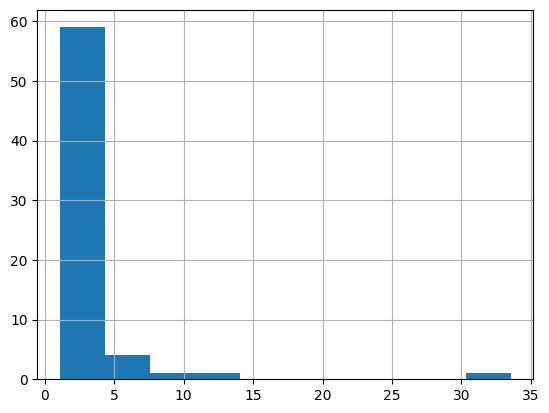

In [163]:
pnds['max_pnd'].hist()

Итак, чаще всего pnd варьируется в пределах 1.5-2.5, экстремальные значения редки (единичные случаи). Возможно, большая часть этих значений даже не были намеренными pump'n'dump кампаниями, предположительно, это мог быть просто рост на фоне каких-то новостей или что-то, не связанное с махинациями. Тем не менее и они имеют место быть.

Окупаемость инвестиций в монету

In [23]:
# Будем считать, что мы покупаем монеты в момент открытия биржи, а продаем - в момент закрытия
# То есть берем за первоначальную цену open, а за финальную - close

def compute_roi(coins, investments, start_date, end_date):

  # Ограничиваем датасет промежутком дат и списком монет, в которые инвестируем

  dates_frame = coins[coins['date'].between(start_date, end_date)]
  symbol_frame = dates_frame[dates_frame['symbol'].isin(investments.keys())]

  final_portfolio = {}

  # Для каждой монеты из портфеля вычисляем первоначальное купленное количество монет
  # деля инвестиции на цену монеты, потом умножаем количество купленных монет на финальную цену
  # и добавляем в словарь для финальной стоимости портфеля, для каждой монеты свой ключ

  for currency in investments.keys():

    # Выбираем только строчки для конкретной монеты

    currency_data = symbol_frame.loc[symbol_frame['symbol'] == currency]

    # Вычисляем цену первоначальную и финальную (я беру их не по датам, а по номерам, первую и последнюю
    # в датасете), так как может случиться так, что у нас не будет данных за дату открытия, и тогда
    # функция выдаст ошибку. А так мы можем посчитать инвестиции в обозначенном окне

    open_price = currency_data.loc[currency_data.index[0], 'open']
    close_price = currency_data.loc[currency_data.index[-1], 'close']

    initial_investment = investments[currency]/open_price
    final_investment = close_price*initial_investment
    final_portfolio.update({currency: final_investment})

  # Считаем первоначальную стоимость портфеля, потом финальную, потом считаем разницу и делим на
  # первоначальную стоимость, удобно перевести значение в проценты, так легче интерпретировать

  initial_p_value = sum(investments.values())
  final_p_value = sum(final_portfolio.values())
  ROI = format((final_p_value-initial_p_value)/initial_p_value, ".01%")

  return ROI

In [24]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

'-2.7%'

In [25]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

'5135.1%'

Технический анализ при помощи скользящего среднего и границ Боллинджера

In [26]:
def plot_bollinger_bands(coins, symbol, window, width):

  symbol_frame = coins[coins['symbol'] == symbol]

  # Скользящие среднее и стандартное отклонение

  mean = symbol_frame['price'].rolling(window=window).mean()
  std = symbol_frame['price'].rolling(window=window).std()

  fig = plt.figure(figsize=(15, 9))

  # Чтобы график был читабильнее, и легче было судить о выполнении правила,
  # ограничимся просто ценой монеты (не будем рисовать ohlc график, так как он
  # уже заведомо будет делать правило хуже за счет выбросов)

  plt.plot(symbol_frame['price'], label = 'Цена', color ='crimson')

  plt.plot(mean, label = 'Скользящее среднее', color = 'steelblue')

  # Закрасим область между границами Боллинджера, границы обозначим более темным цветом

  plt.fill_between(symbol_frame.index, y1 = mean + width*std, y2 = mean - width*std, color = 'paleturquoise', label = 'Окно Боллинджера')
  plt.plot(mean + width*std, color = 'mediumturquoise')
  plt.plot(mean - width*std, color = 'mediumturquoise')



  plt.legend(loc = 'best')

  plt.xticks(np.arange(0, len(symbol_frame.index), 30))

  plt.xlabel('Дата')
  plt.ylabel('Цена, в долларах')

  plt.grid(True)

  plt.show()

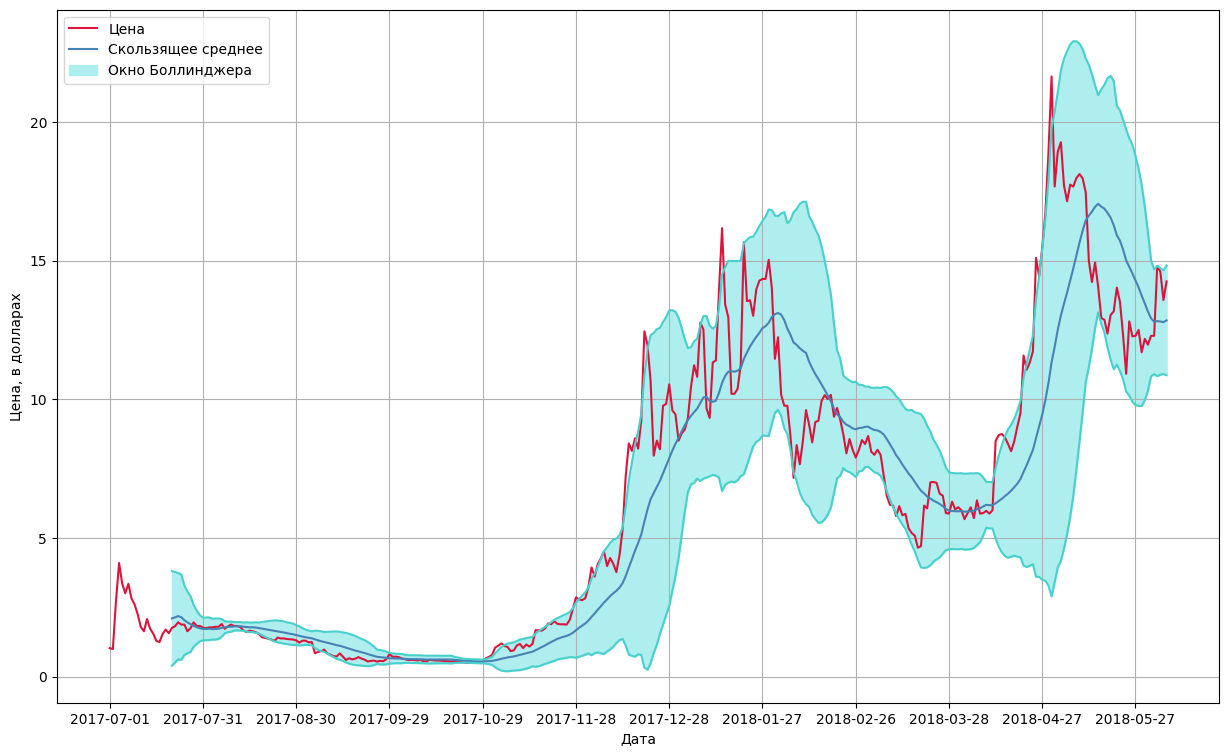

In [27]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

График, касаясь границы, должен отражаться, то есть график цены всегда должен сохраняться внутри промежутка границ. В целом, с небольшими оговорками это правило сохраняется (график периодически вылезает за границы, но потом, как и положено, отражается). Я прочитала, что общее правило гласит, что 95% графика должно находиться в промежутке, а 5% - за него вылезать, и если судить визуально, то оно работает на изображенной диаграмме

Анализ капитализаций монет, визуализация

In [28]:
def plot_coins_capitalizations(coins, symbols, start_date):

  # Ограничим даты, с которых начинаем отсчет

  dates_frame = coins[coins['date'] >= start_date ]

  # Считаем суммарную капитализацию для каждого дня

  sum_cap = dates_frame.groupby(level = 0)['market'].sum()

  # Выбираем только данные нужных нам монет

  symbol_frame = dates_frame[dates_frame['symbol'].isin(symbols)]

  # Создаем темплейт для графиков

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
  fig.subplots_adjust(hspace=0.2)

  # Здесь будем хранить графики для легенды

  lines = []

  # Для каждой монеты рисуем капитализацию и долю от общей капитализации

  for i in range(len(symbols)):

    # Выбираем только нужные значения
    data = symbol_frame.loc[symbol_frame['symbol'] == symbols[i]]

    # Капитилизацию сохраняем в переменную для добавления легенды
    line, = ax1.plot(data['market'], label = symbols[i])

    # Долю просто рисуем, так как данные для легенды уже сохранили
    ax2.plot((data['market']/sum_cap)*100)

    lines.append(line)

  # Располагаем легенды

  ax1.legend(handles=lines, loc = 'upper right')
  ax2.legend(handles=lines, loc = 'upper right')

  # Выставляем частоту x ticks, чтобы они не накладывались друг на друга

  ax1.set_xticks(np.arange(0, len(data['market']), 50))
  ax2.set_xticks(np.arange(0, len(data['market']), 50))

  # Переходим из scientific format, чтобы было легче интерпретировать данные

  ax1.ticklabel_format(style='plain', axis='y')

  # Лейблы и сетка

  ax1.set_xlabel('Дата')
  ax1.set_ylabel('Объем капитализации, в долларах')
  ax1.grid(True)

  ax2.set_xlabel('Дата')
  ax2.set_ylabel('Доля от суммарной капитализации, в процентах')
  ax2.grid(True)

  plt.show()


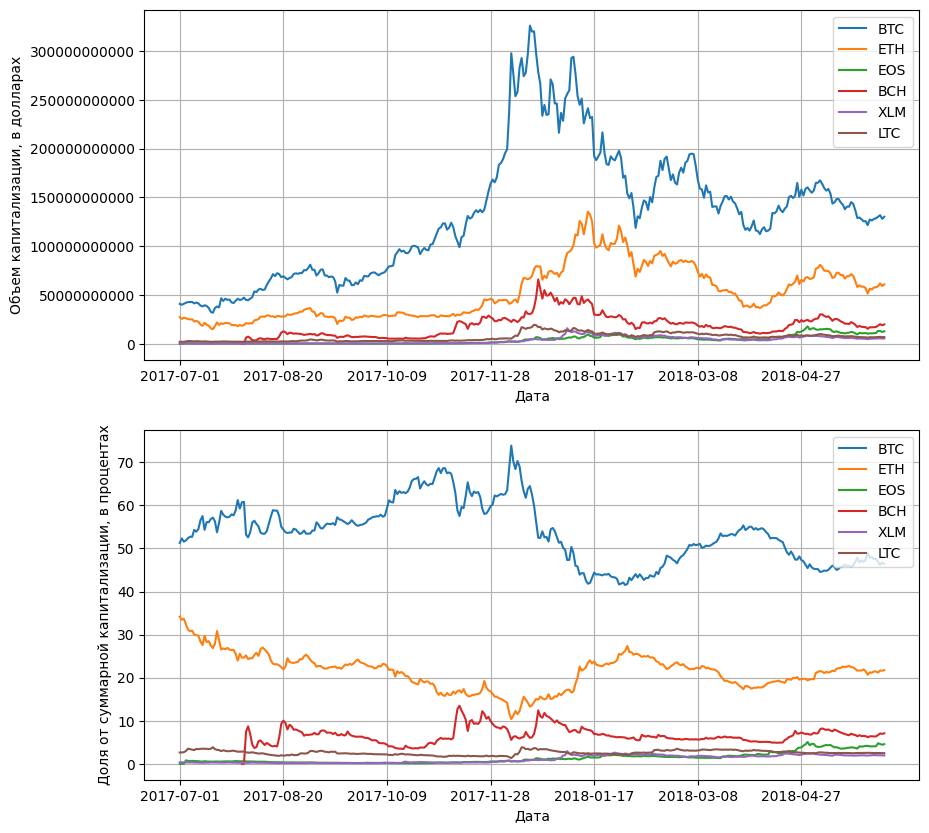

In [29]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Как видно из графика, доля альткойнов обратно пропорциональна доле биткоина в общей капитализации. Это происходит потому, что биткоин - основной актив крипторынка, он вносит (как мы увидели в первом задании) больше половины капитализации в суммарную капитализацию рынка. Когда он падает в цене, общая капитализация заметно снижается, и относительный вес альткоинов растет, так как их цена и капитализация остаются примерно на одном уровне, а биткоин сильно утягивает суммарную капитализацию вниз своим падением, снижая вместе с тем и свою долю в ней. Вот и получается, что когда биткоин раздувает капитализацию своим ростом, и его доля растет, альткоины в сравнении с ним становятся малы по доле. Скачки доли биткоина соответствуют падениям доли альткоинов и наоборот, это особенно хорошо видно в случае с Эфириумом.

Анализ корреляций монет

In [81]:
def calc_coins_correlations(coins, date, symbols, window, alpha):

  cutoff_date = pd.to_datetime(date) - pd.Timedelta(days=window)
  date_rng = pd.date_range(cutoff_date, pd.to_datetime(date))
  mask = (pd.to_datetime(coins['date']) > date_rng[0]) & (pd.to_datetime(coins['date']) <= date_rng[-1])
  dates_frame = coins.loc[mask]

  sum_cap = dates_frame.groupby(level = 0)['market'].sum()
  symbol_frame = dates_frame[dates_frame['symbol'].isin(symbols)]
  symbol_frame['share_cap'] = symbol_frame['market']/sum_cap

  correlations = pd.DataFrame(columns = [symbols], index = dates_frame.index)
  for symbol in symbols:
    correlations[symbol]= symbol_frame.groupby(['symbol']).get_group(symbol)['share_cap'].ewm(alpha=alpha).mean()

  return correlations.corr()




In [82]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)


In [83]:
correlations

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.000000,-0.957635,-0.982491,-0.925146,-0.883023,-0.858564,-0.973973
ETH,-0.957635,1.000000,0.955368,0.785766,0.775612,0.960392,0.908138
EOS,-0.982491,0.955368,1.000000,0.881808,0.913395,0.858121,0.979004
BCH,-0.925146,0.785766,0.881808,1.000000,0.888333,0.608762,0.902516
XLM,-0.883023,0.775612,0.913395,0.888333,1.000000,0.605023,0.926486
LTC,-0.858564,0.960392,0.858121,0.608762,0.605023,1.000000,0.809335
ADA,-0.973973,0.908138,0.979004,0.902516,0.926486,0.809335,1.000000


In [100]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

pd.set_option('styler.format.precision', 2)
correlations.style.background_gradient(cmap='coolwarm')

,"('BTC',)","('ETH',)","('EOS',)","('BCH',)","('XLM',)","('LTC',)","('ADA',)"
BTC,1.00,-0.98,0.88,-0.96,-0.01,-0.04,-0.85
ETH,-0.98,1.00,-0.94,0.91,-0.14,-0.01,0.77
EOS,0.88,-0.94,1.00,-0.81,0.15,-0.12,-0.65
BCH,-0.96,0.91,-0.81,1.00,0.21,0.17,0.90
XLM,-0.01,-0.14,0.15,0.21,1.00,0.73,0.39
LTC,-0.04,-0.01,-0.12,0.17,0.73,1.00,0.26
ADA,-0.85,0.77,-0.65,0.90,0.39,0.26,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [102]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:

pd.set_option('styler.format.precision', 2)
correlations.style.background_gradient(cmap='coolwarm')

,"('BTC',)","('ETH',)","('EOS',)","('BCH',)","('XLM',)","('LTC',)","('ADA',)"
BTC,1.00,-0.96,-0.98,-0.93,-0.88,-0.86,-0.97
ETH,-0.96,1.00,0.96,0.79,0.78,0.96,0.91
EOS,-0.98,0.96,1.00,0.88,0.91,0.86,0.98
BCH,-0.93,0.79,0.88,1.00,0.89,0.61,0.90
XLM,-0.88,0.78,0.91,0.89,1.00,0.61,0.93
LTC,-0.86,0.96,0.86,0.61,0.61,1.00,0.81
ADA,-0.97,0.91,0.98,0.90,0.93,0.81,1.00


Анализ торговой стратегии

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.


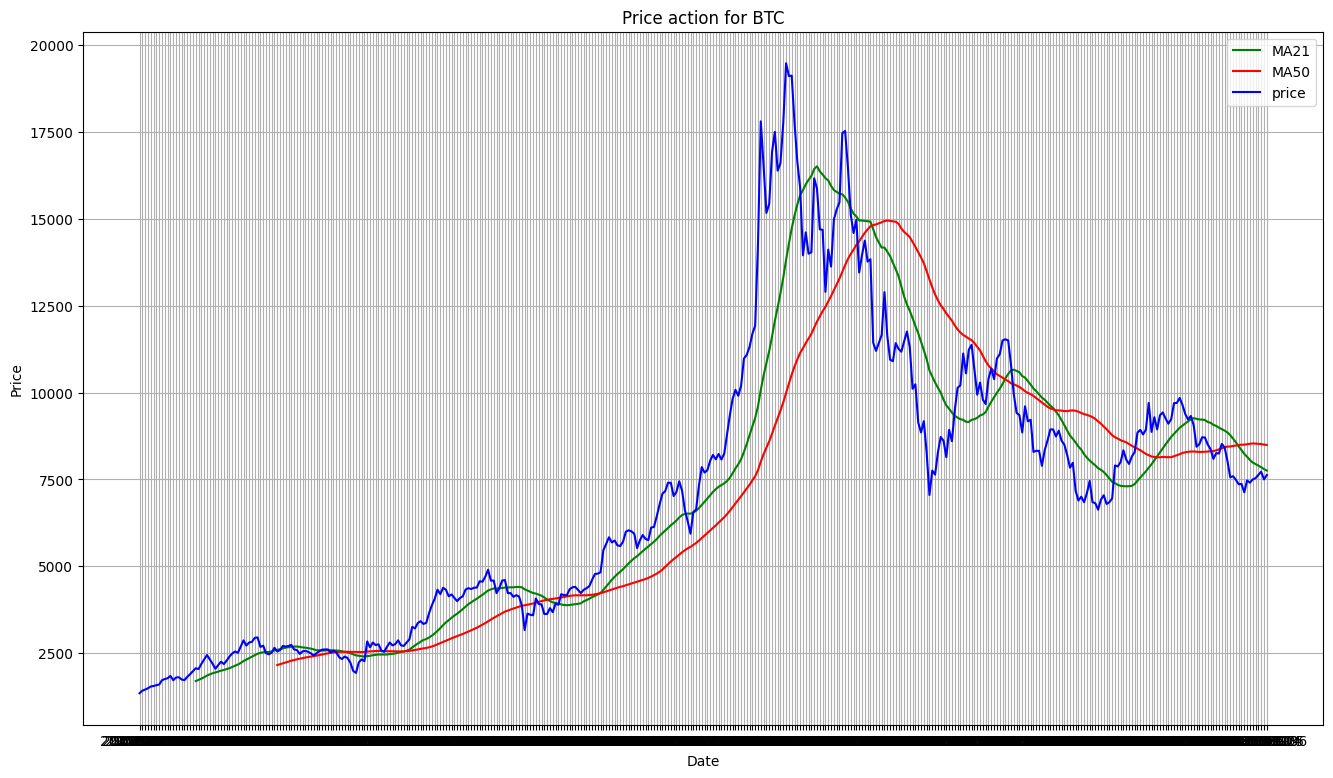

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Описание стратегии и примечание немного противоречат друг другу (в описании написано, что если lead_window >= lag_window мы покупаем, если наоборот - продаем, то есть как будто доступны и лонг, и шорт позиции, а в примечаниях написано, что мы покупаем, если lead_window + treshold >= lag_window, а в обратном случае просто ничего не делаем, то есть нет шорт позиций). По сути, второе описание это и есть buy-hold стратегия, поэтому я буду придерживаться первого описания: разница в средних больше трешхолда = покупаем, разница в средних меньше трешхолда = продаем.

Я доопределила несколько функций, которые задают стратегии. Немного опишу, как я их поняла, и с какой логикой их писала:

1. Moving-Average стратегия

Мы определяем сигналы: если разница в средних предыдущего дня больше трешхолда, мы покупаем монету заново, то есть у нас просто перемножаются мультипликаторы двух дней (у нас было m_1 монет вчера, на следующий день у нас m_1*m_2, так как наш актив вырос, то, что было у нас вчера (вчерашний мультипликатор), умножается на сегодняшний рост). Если разница меньше трешхолда, мы продаем: мы вчерашний мультипликатор умножили на цену вчерашнего дня, то есть как бы вывели криптовалюту в кэш, а на следующий день мы не умножаем ее на сегодняшний мультипликатор, а просто делим на сегодняшнюю цену, так как нам нужно чтобы наши средства были в выражении относительно монет, а при продаже я перевела их в кэш. Пока сигнал == -1, мы держим монеты в кэше (повторяем вторую операцию просто, поддерживая стоимость портфеля в величине относительно монет).

2. Buy-Hold стратегия

Здесь по сути просто происходит итеративная покупка монеты снова и снова, мы держим активы в монетах, и отслеживаем рост наших активов кумулятивным последовательным домножением мультипликаторов. То есть наши активы все время в монетах.

In [246]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):

  MA_s = moving_average_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)
  BH_s = buy_hold_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)

  figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))

  ax1.plot(list(MA_s), label = 'Moving Average Strategy')
  ax1.plot(list(BH_s), label = 'Buy & Hold Strategy')
  ax1.legend()
  ax1.set_xticks(np.arange(0, len(MA_s), 500))
  ax1.set_xlabel('Дата')
  ax1.set_ylabel('Мультипликаторы стратегий')
  ax1.grid(which='major')


  # Здесь пользуемся кодом, предоставленным в задании

  coin = coins[coins['symbol'] == symbol][start_date:end_date]
  price = coin['price']
  leading_mean = price.rolling(window=leading_window).mean()
  lagging_mean = price.rolling(window=lagging_window).mean()

  ax2.set_title('Цена и скользящие средние для {}'.format(symbol))
  ax2.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
  ax2.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
  ax2.plot(price, color='blue', label='Цена')
  ax2.set_xticks(np.arange(0, len(MA_s), 500))
  ax2.set_xlabel('Дата')
  ax2.set_ylabel('Цена')
  ax2.legend(loc='best')
  ax2.grid(which='major')

  plt.show()


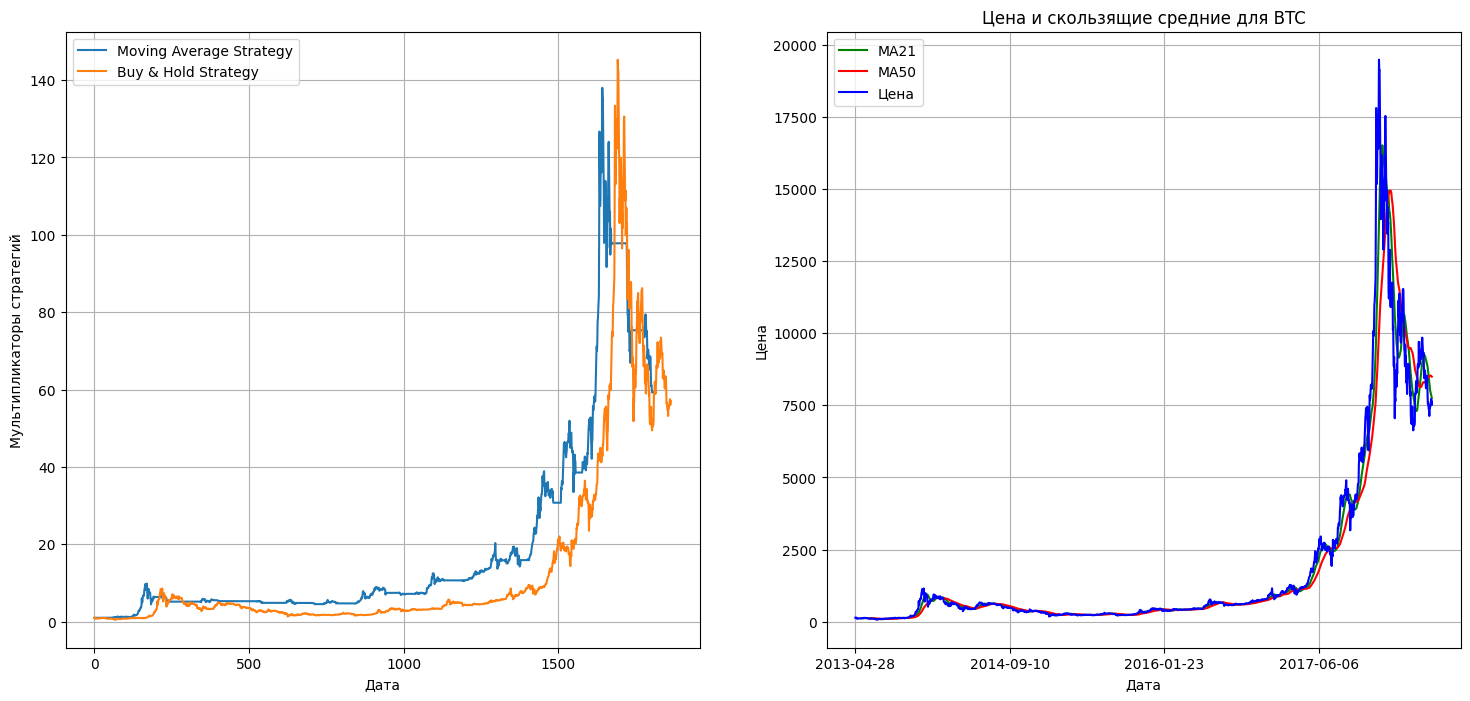

In [247]:
plot_moving_averages_strategy(
    coins, 'BTC', 21, 50, 0.01, '2013-04-28', '2018-06-06')

In [241]:
def moving_average_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):

  """
  Функция воспроизводит механизм Moving Average стратегии, возвращая кумулятивное произведение мультипликаторов.
  """

  # Отделяем часть датасета, с которой будем работать



  dates_frame = coins[start_date:end_date]
  symbol_frame = dates_frame[dates_frame['symbol'] == symbol]

  # Создаем датафрейм стратегии, после каждой операции с .shift(1) осуществляем .dropna(), так как метод генерирует пустые значения
  # Определяем основные значения, которыми будем пользоваться (цена, ведущее и запаздывающее средние)

  strategy = pd.DataFrame(index=symbol_frame.index)

  strategy['price']=symbol_frame['close']
  strategy['leadMA']=symbol_frame['close'].rolling(window=leading_window).mean()
  strategy['lagMA']=symbol_frame['close'].rolling(window=lagging_window).mean()
  strategy.dropna(inplace=True)

  # Считаем столбец с разницей, делим на цену (как сказано в примечании, чтобы не было путаницы с трешхолдами)

  strategy['difference']=(strategy['leadMA']-strategy['lagMA'])/strategy['price']

  # Определяем сигналы

  strategy['signal'] = np.where(strategy['difference'] >= threshold,1,-1)

  # Задаем мультипликаторы buy-hold стратегии (по умолчанию, просто рост монеты)

  strategy['default_multipliers'] = strategy['price']/strategy['price'].shift(1)
  strategy.dropna(inplace=True)

  # Задаем мультипликаторы стратегии: если покупаем - домножаем на мультипликатор роста, если продаем - просто выражаем кэш
  # в текущей цене монеты с момента продажи

  strategy['strategy_multipliers'] = np.where(strategy['signal'].shift(1) == 1,
                                              strategy['default_multipliers']*strategy['signal'].shift(1),
                                               (strategy['default_multipliers']*strategy['price'].shift(1))/strategy['price'])
  strategy.dropna(inplace=True)

  strategy['cumulative_multipliers'] = strategy['strategy_multipliers'].cumprod()
  strategy.dropna(inplace=True)

  return strategy['cumulative_multipliers']

In [183]:
def buy_hold_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):

  """
  Функция воспроизводит мезанизм Buy-Hold стратегии, возвращая кумулятивное произведение всех мультипликаторов.

  """

  dates_frame = coins[coins['date'].between(start_date, end_date)]
  symbol_frame = dates_frame[dates_frame['symbol'] == symbol]

  strategy = pd.DataFrame(index=symbol_frame.index)
  strategy['price']=symbol_frame['close']

  # Задала мультипликаторы роста монеты по умолчанию

  strategy['default_multipliers'] = strategy['price']/strategy['price'].shift(1)
  strategy.dropna(inplace=True)

  return strategy['default_multipliers'].cumprod()


In [243]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Я рассмотрела разные параметры вручную, попробовав построение графика для каждой из представленных монет, и, несмотря на то, что в каждом конкретном случае все зависит от монеты, я бы не сказала, что эта стратегия применима, простая Buy&Hold чаще всего показывает себя лучше (наше благосостояние в конце периода инвестирования больше), хотя в классическом трейдинге обычно придерживаются обратного мнения, и считается, что MA лучше чем BH. Также, есть прямая зависимость от трешхолда, чем он ниже, тем стратегия себя лучше показывает, так как если трешхолд высокий, то мы почти никогда не покупаем. В целом, общая динамика монет такова, что со временем они неограниченно растут без сильных падений, и поэтому BH объяснимо лучше, даже когда цена не подходит под условие трешхолда, просто покупать больше - лучше, так как впоследствии актив все равно растет. Плюс сказывается то, что мы принимаем решения с разрывом по времени (из-за lagging_window), хотя изменения параметров окон показало себя как не сильно влияющий аспект, больше все-таки важны трешхолд и сама монета.

Вывод: стратегия малоприменима на крипторынке